In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

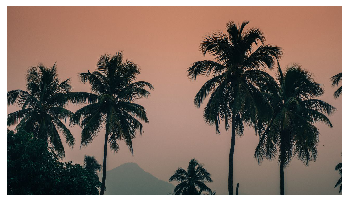

In [3]:
img = plt.imread(r'C:/Users/HP/Desktop/Image Compression using K_means/Image1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
type(img)

numpy.ndarray

In [5]:
print(img.shape)

(720, 1280, 3)


In [6]:
print(img.size)

2764800


In [9]:
#width, height and depth
w, h, d = img.shape 
image_array = img.reshape(w*h, d)
print(image_array.shape)
#normalize in the range of (0,1)
image_array = image_array/225

(921600, 3)


In [10]:
from sklearn.utils import shuffle
#fitting model on a small sample of the complete image
image_array_sample = shuffle(image_array, random_state = 1)[:1000]
image_array_sample.size

3000

In [11]:
kmeans = KMeans(n_clusters = 6, random_state = 1) #clusters of pints which acts as pixels of image
kmeans.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [12]:
labels = kmeans.predict(image_array)
labels

array([0, 0, 0, ..., 2, 2, 2])

In [13]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.65488441 0.54019389 0.47949292]
 [0.04281145 0.09700337 0.10217172]
 [0.44679739 0.44087146 0.40636166]
 [0.78498275 0.63759834 0.57797101]
 [0.19665145 0.22319635 0.20828006]
 [0.81873395 0.57225321 0.46450642]]


In [16]:
#recreate original image according to labels and each pixels
def recreate_image(c, labels, w, h, d):
    image = np.zeros((w, h, d))
    label_idx = 0

#now label each pixels according to the limited labels
    for i in range(w):
        for j in range(h):
            image[i][j] = c[labels[label_idx]]
            
            #print(labels[label_idx])
            label_idx+=1
    return(image)

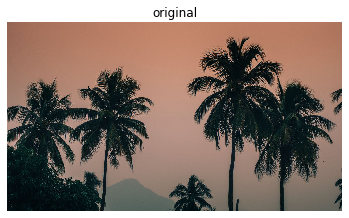

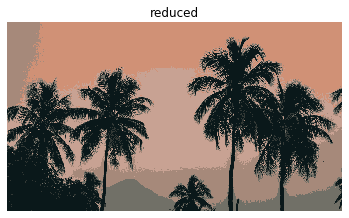

In [17]:
plt.figure(1)
plt.axis('off')
plt.title("original")
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title("reduced")
plt.imshow(recreate_image(c, labels, w, h, d))
plt.show()